In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [118]:
def read_profile(i):
    df = pd.read_csv(f'..//Data//canyon_profile_{i}.csv', names = ['x', 'y'], delimiter='\t')
    loc_req = pd.read_csv('..//Data//location_requirements.csv', index_col='Location ID')

    df['elevation'] = loc_req.loc[i, 'Required Elevation (m)']
    df_ext = pd.DataFrame()
    df_ext['x'] = np.linspace(0, df['x'].max(), 1000)
    df_ext['y'] = np.interp(df_ext['x'], df['x'], df['y'])
    df_ext['elevation'] = df['elevation'].iloc[0]
    df_red = df_ext[df_ext['y'] <= df_ext['elevation']]

    area = np.round(df_red['elevation'].iloc[0] * (df_red['x'].iloc[-1] - df_red['x'].iloc[0]) - np.trapezoid(df_red['y'], df_red['x']), 0)
    length = np.round(df_red['x'].iloc[-1] - df_red['x'].iloc[0], 2)
    height = np.round(df_red['elevation'].iloc[0] - df_red['y'].min(), 2)
    elevation = np.round(df_red['elevation'].iloc[0], 2)
    
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(df['x'], df['y'], label='Canyon profile', color = 'black')
    ax.plot(df_red['x'], df_red['elevation'], label='Required elevation', color = 'red')
    ax.plot(df_red['x'].min(), elevation, 'ro')
    ax.plot(df_red['x'].max(), elevation, 'ro')
    ax.annotate(f'length: {length} m', 
                xy=((df_red["x"].max()+df_red["x"].min())/2, elevation), 
                xytext=(((df_red["x"].max()+df_red["x"].min())/2)-200, elevation+5),
    )
    
    ax.set_title(f'location {i}: area = {area} m², height = {height} m')
    ax.fill_between(df_red['x'], df_red['y'], df_red['elevation'],facecolor = 'none', hatch = '/', label='Reservoir area')

    plt.savefig(f'..//Figures//canyon_profile_{i}.png', dpi=300)
    return area, length, elevation, height

Location 1: Area = 69275.0 m^2, Length = 572.44 m, Elevation = 780.4 m, Height = 201.13 m
Location 2: Area = 42977.0 m^2, Length = 449.01 m, Elevation = 617.5 m, Height = 151.5 m
Location 3: Area = 29016.0 m^2, Length = 417.56 m, Elevation = 575.0 m, Height = 134.5 m
Location 4: Area = 61005.0 m^2, Length = 1017.3 m, Elevation = 537.5 m, Height = 121.99 m
Location 5: Area = 39873.0 m^2, Length = 508.71 m, Elevation = 516.0 m, Height = 116.0 m


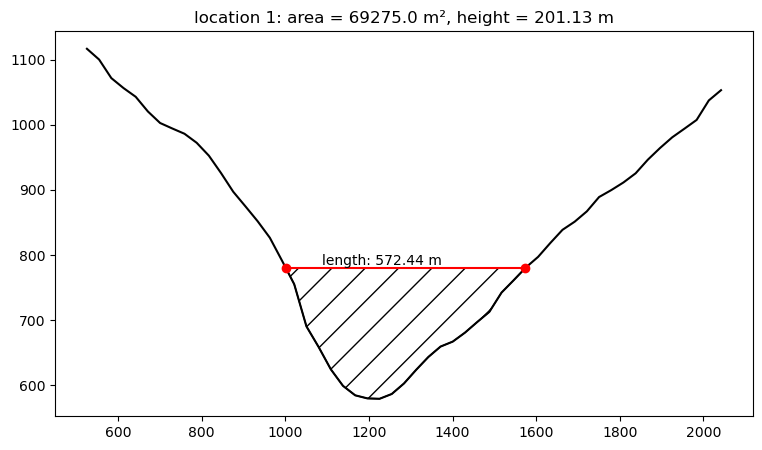

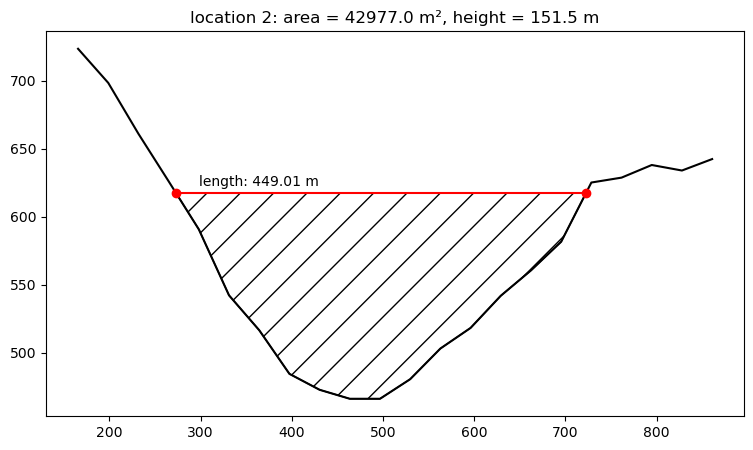

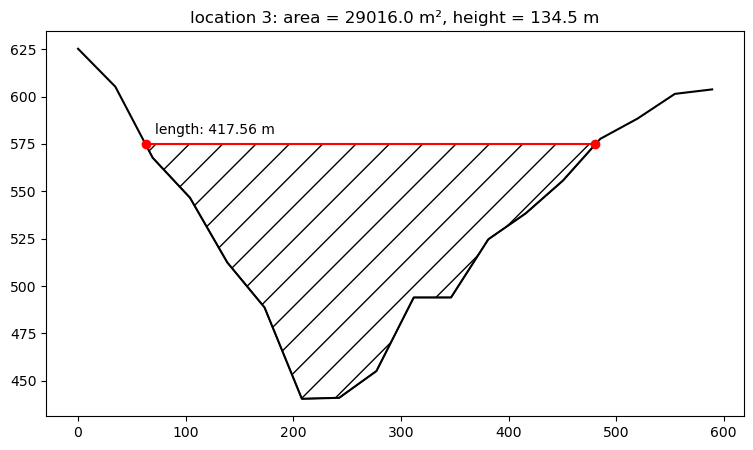

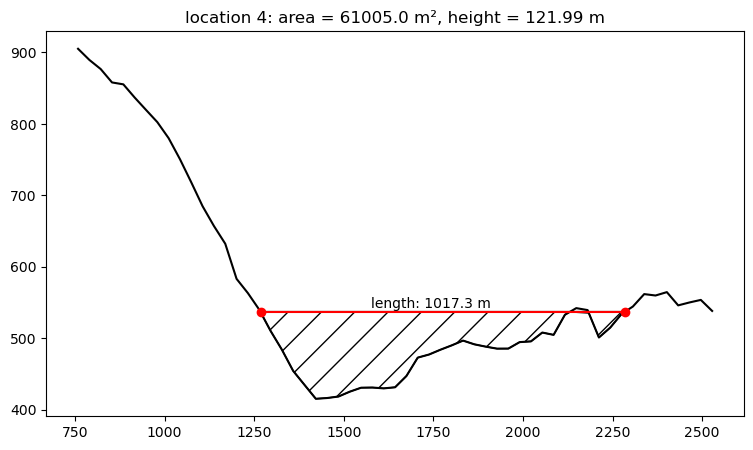

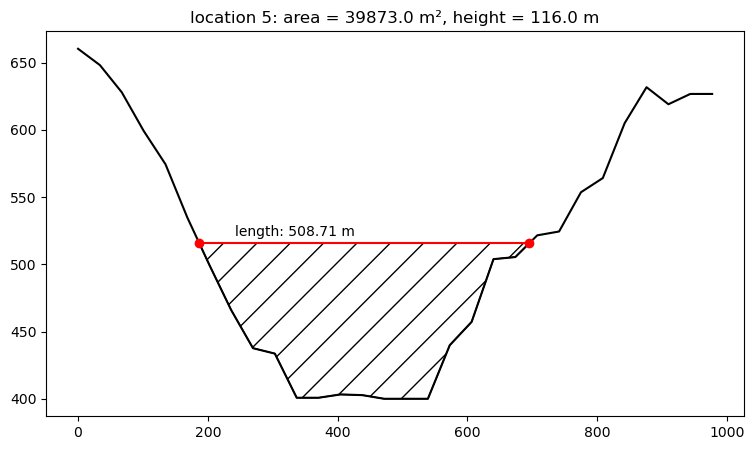

In [119]:
for i in range(5):
    area, length, elevation, height = read_profile(i+1)
    print(f'Location {i+1}: Area = {area} m^2, Length = {length} m, Elevation = {elevation} m, Height = {height} m')